<a href="https://www.kaggle.com/code/shubhamchauda/predicting-heart-disease?scriptVersionId=133651530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv(path)

In [3]:
new_column = dict((i,i.lower().replace(' ',"_")) for i in data.columns)
data.rename(columns =new_column,inplace =True )

In [4]:
data.head()

,index,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
data.drop(['index'] ,axis = 1,inplace = True)

In [6]:
data.describe()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      270 non-null    int64  
 1   sex                      270 non-null    int64  
 2   chest_pain_type          270 non-null    int64  
 3   bp                       270 non-null    int64  
 4   cholesterol              270 non-null    int64  
 5   fbs_over_120             270 non-null    int64  
 6   ekg_results              270 non-null    int64  
 7   max_hr                   270 non-null    int64  
 8   exercise_angina          270 non-null    int64  
 9   st_depression            270 non-null    float64
 10  slope_of_st              270 non-null    int64  
 11  number_of_vessels_fluro  270 non-null    int64  
 12  thallium                 270 non-null    int64  
 13  heart_disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
data .columns

Index(['age', 'sex', 'chest_pain_type', 'bp', 'cholesterol', 'fbs_over_120',
       'ekg_results', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'number_of_vessels_fluro', 'thallium', 'heart_disease'],
      dtype='object')

In [9]:
data_dummy =  data.copy()

# Visualization

<AxesSubplot:>

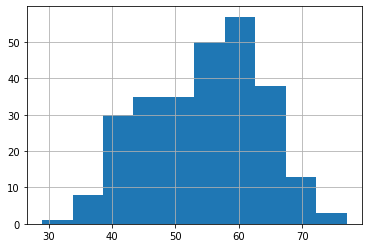

In [10]:
data['age'].hist()

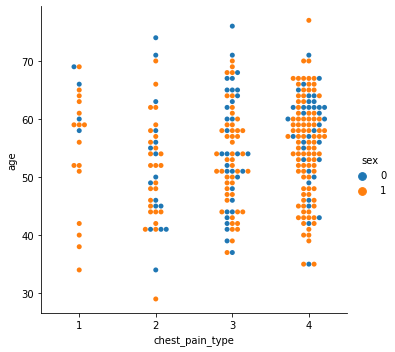

In [11]:
sns.catplot(data=data, x="chest_pain_type", y="age", hue="sex", kind="swarm")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


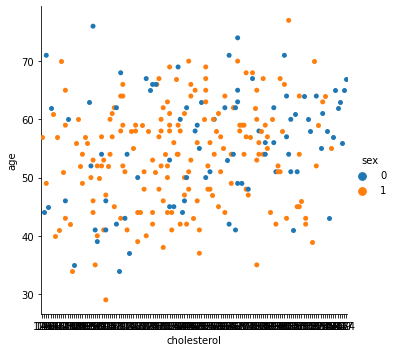

In [12]:
sns.catplot(data=data, x="cholesterol", y="age", hue="sex", kind="swarm")

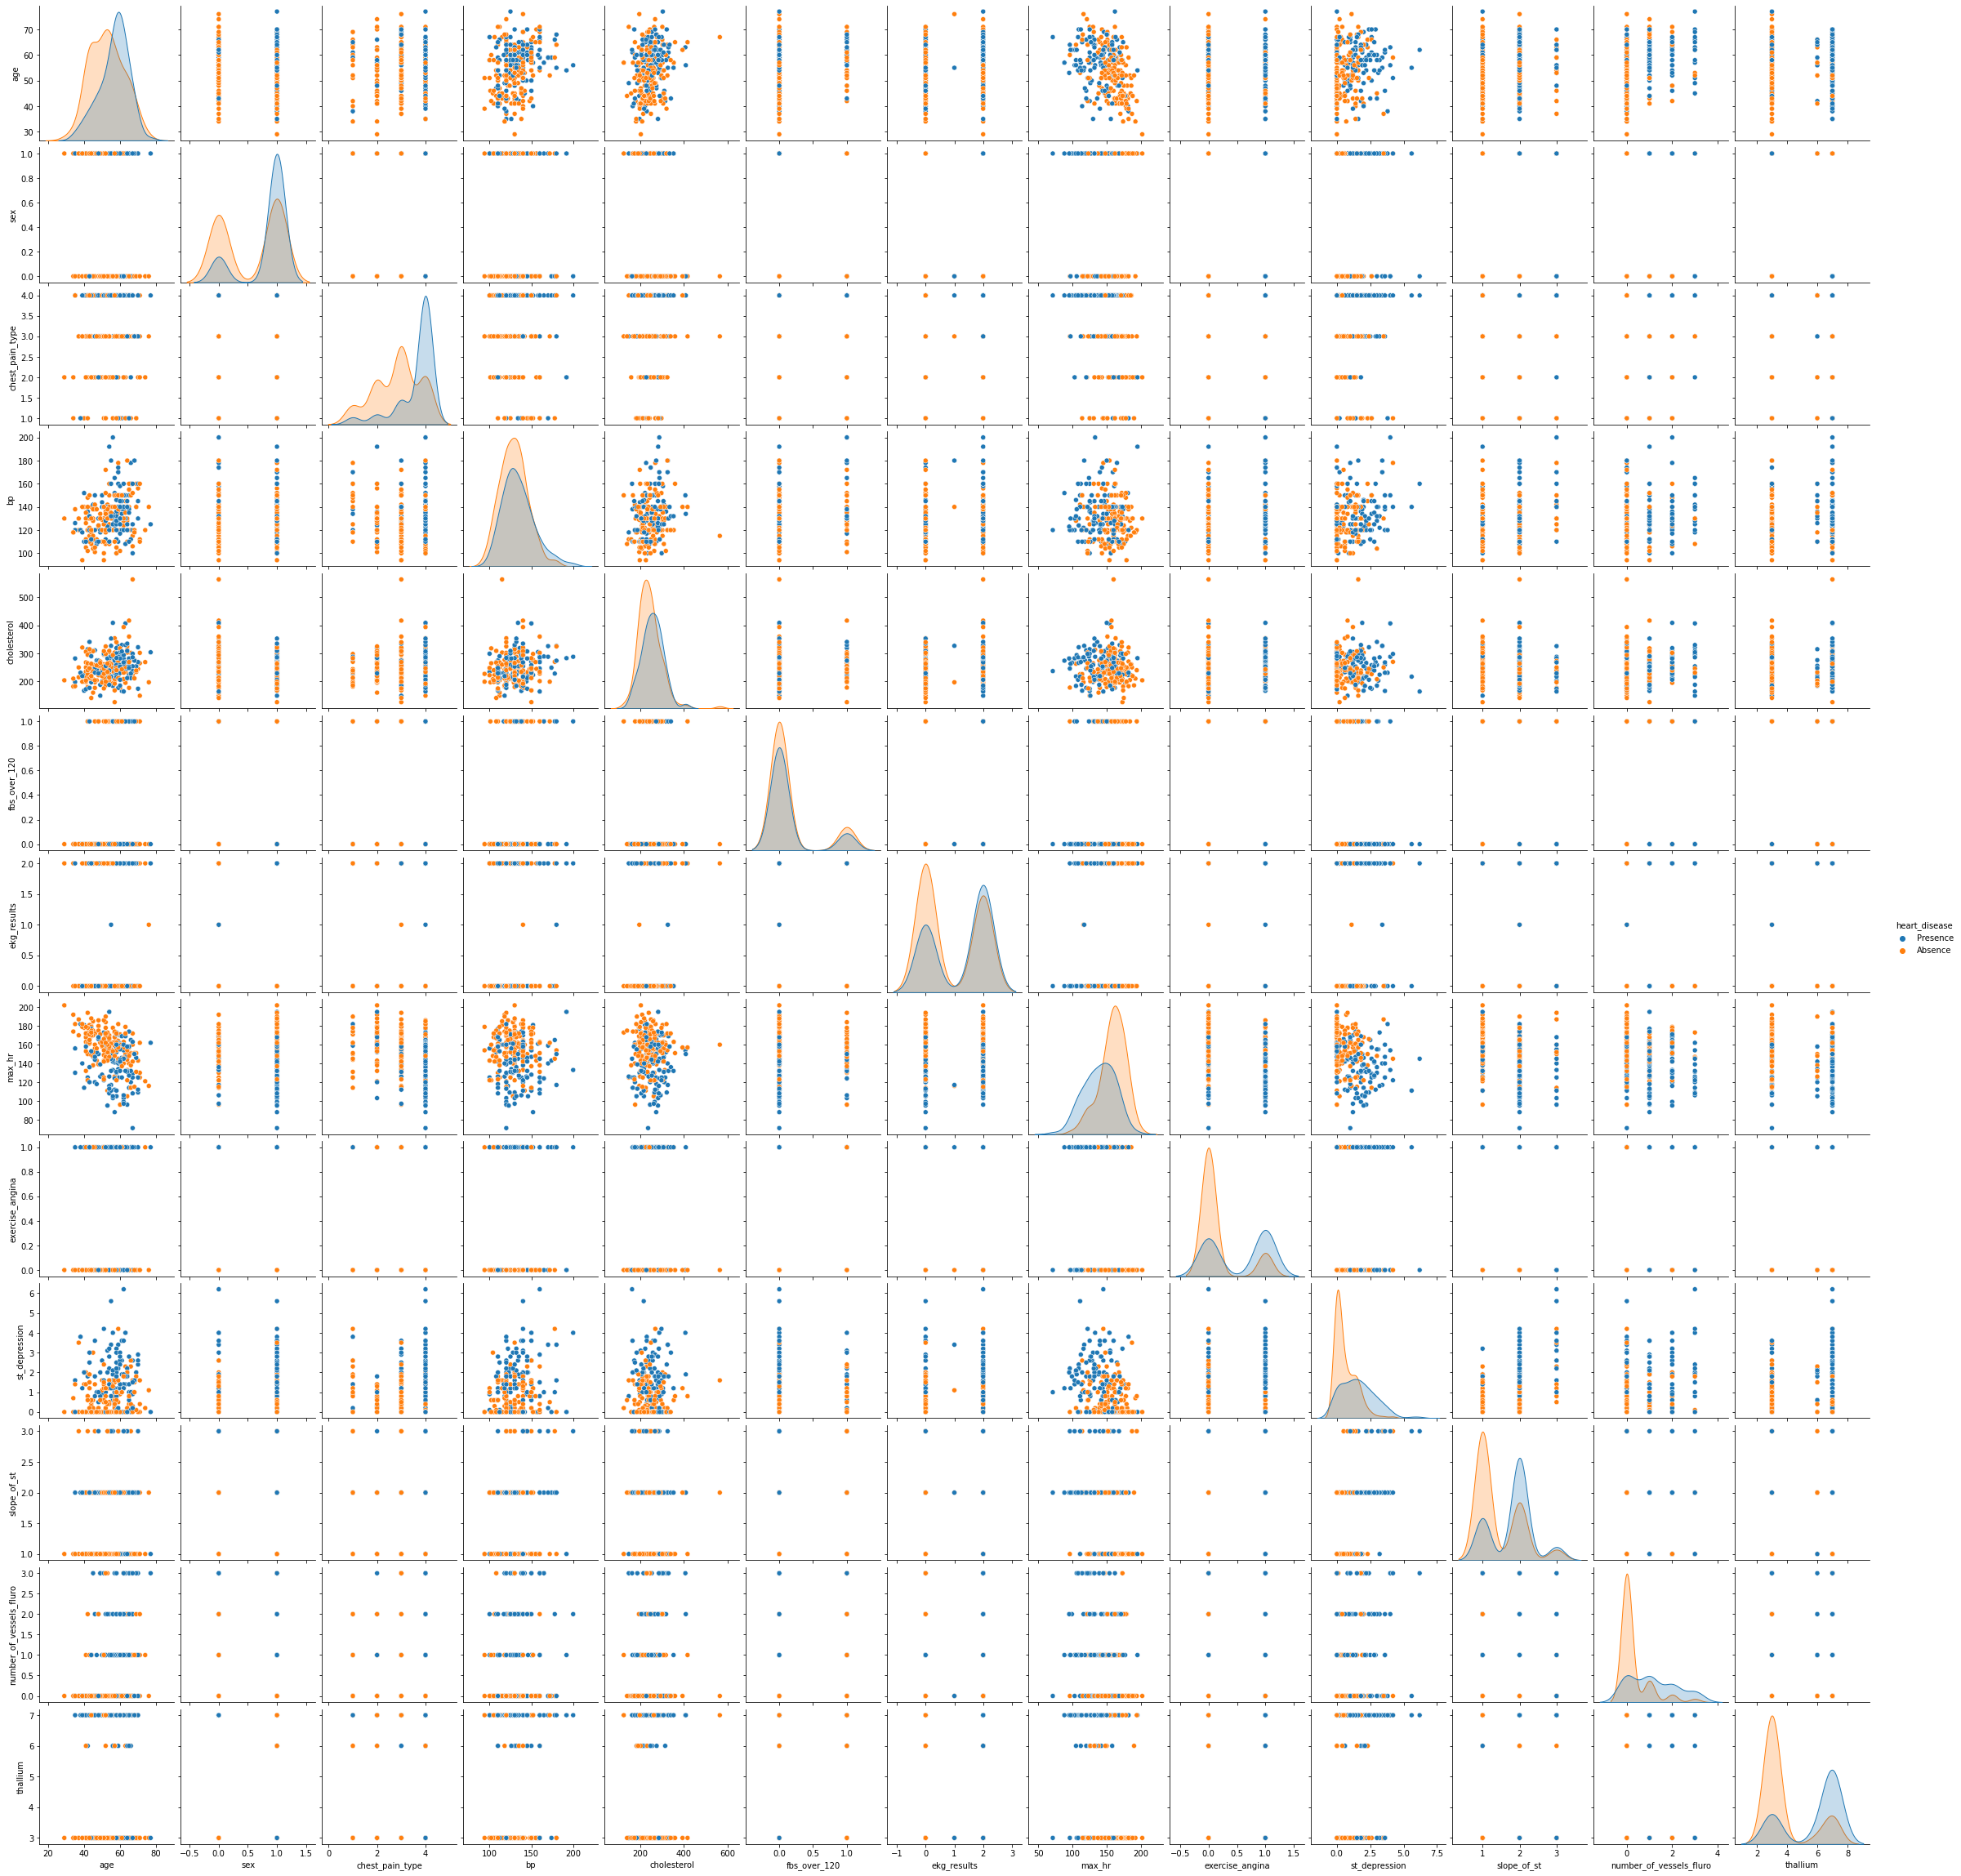

In [13]:
sns.pairplot(data,hue='heart_disease')

In [14]:
data['bp'].unique()

array([130, 115, 124, 128, 120, 110, 140, 150, 135, 142, 134, 112, 132,
       138, 160, 170, 144, 122, 152, 101, 126, 118, 136, 105, 174, 145,
       108, 156, 106, 104,  94, 146, 148, 178, 125, 100, 165, 180, 158,
       200, 117, 192, 123, 129, 102, 155, 172])

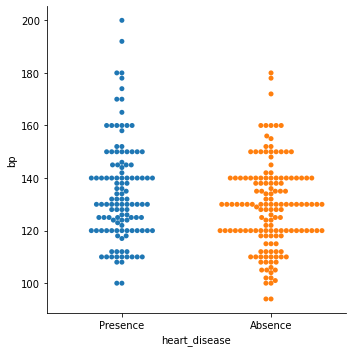

In [15]:
sns.catplot(data=data, x="heart_disease", y="bp", kind="swarm")

# **Feature Engineering**

In [16]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(data[['age']]) 
data['Scaled_age'] = minmaxscaler.transform(data[['age']])

In [17]:
data.head()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease,Scaled_age
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,0.854167
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0.791667
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,0.583333
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0.729167
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0.937500


In [18]:
column_list = data.columns
column_list

Index(['age', 'sex', 'chest_pain_type', 'bp', 'cholesterol', 'fbs_over_120',
       'ekg_results', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'number_of_vessels_fluro', 'thallium', 'heart_disease',
       'Scaled_age'],
      dtype='object')

In [19]:
data[['bp', 'cholesterol','st_depression']] = StandardScaler().fit_transform(data[['bp', 'cholesterol','st_depression']])


#### **Label Encoding**

In [20]:
categ = ['thallium','slope_of_st','chest_pain_type','heart_disease']
data[categ] = data[categ].apply(LabelEncoder().fit_transform)

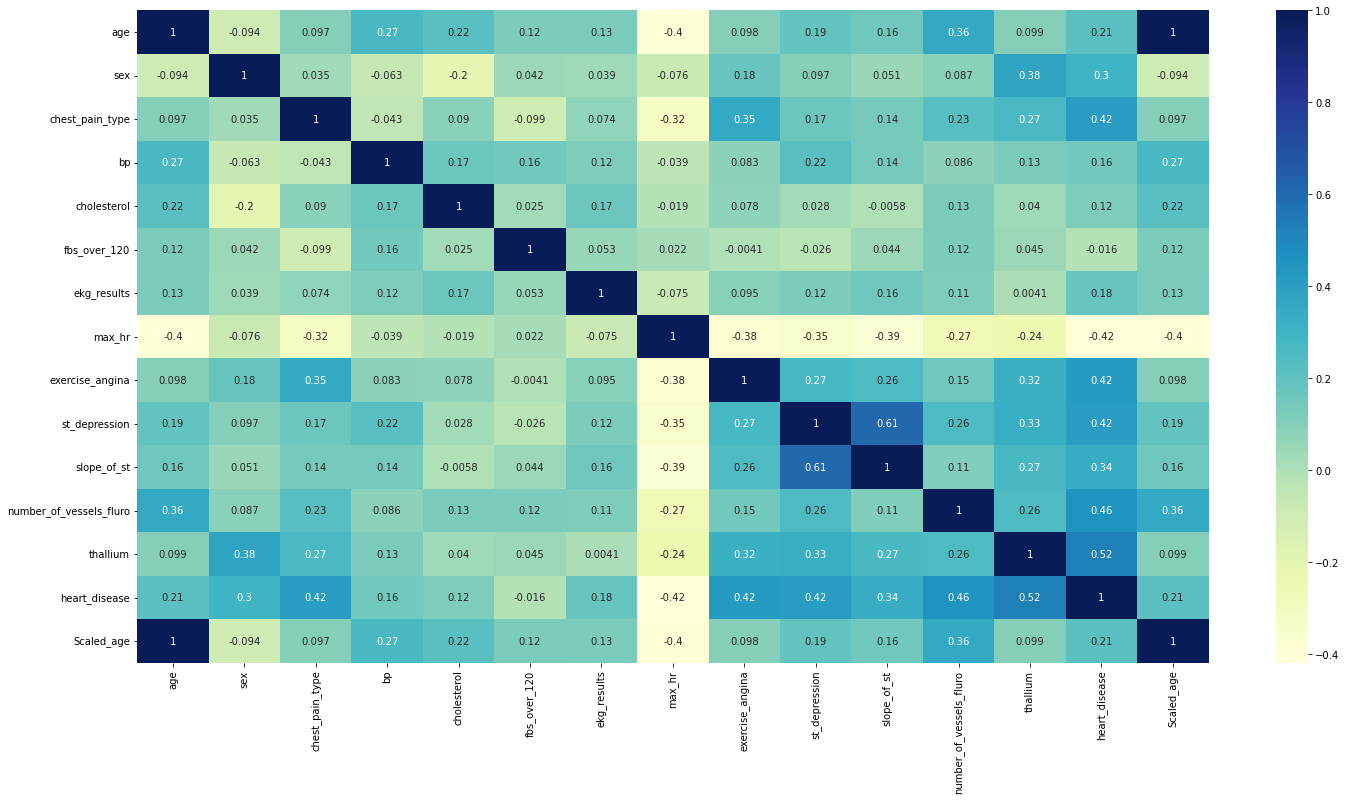

In [21]:
fig, ax = plt.subplots(figsize=(24,12))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,ax= ax)

In [22]:
data.drop(['max_hr','ekg_results','fbs_over_120'],axis = 1,inplace = True)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

## **Using KNN**
We'll start with k=1.

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
x_axis ,y_axis = data.drop(['heart_disease'],axis = 1),data['heart_disease']

In [26]:
x_axis.shape,y_axis.shape

((270, 11), (270,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split( x_axis, y_axis, test_size=0.33, random_state=42)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:

pred = knn.predict(X_test)

## **Predictions and Evaluations**

In [30]:
print(confusion_matrix(y_test,pred))

[[46  8]
 [14 22]]


In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        54
           1       0.73      0.61      0.67        36

    accuracy                           0.76        90
   macro avg       0.75      0.73      0.74        90
weighted avg       0.75      0.76      0.75        90



## **Choosing a K Value**

In [32]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_axis,y_axis,cv=10)
    accuracy_rate.append(score.mean())

In [33]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

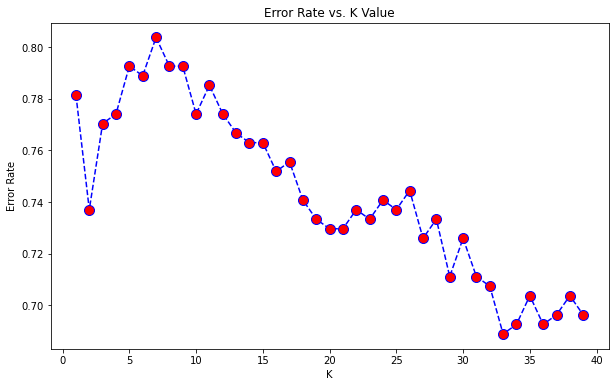

In [34]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')